# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df = df.drop_duplicates().reset_index(drop=True)

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [6]:
#Escalar

df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]

num_variables = ['age','bmi','children','sex_n','smoker_n','region_n','charges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas, index = df.index,columns=num_variables)
df_escalado

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816
...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,1.0,1.0,0.666667,0.151299
1333,0.000000,0.429379,0.0,0.0,1.0,1.000000,0.017305
1334,0.000000,0.562012,0.0,0.0,1.0,0.333333,0.008108
1335,0.065217,0.264730,0.0,0.0,1.0,0.000000,0.014144


In [7]:
from sklearn.model_selection import train_test_split

X = df_escalado.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
print(f'Intercepto (a): {model.intercept_}')
print(f'Coeficientes: {model.coef_}')
df_escalado.columns

Intercepto (a): 20758.584389905795
Coeficientes: [ 11443.14728148  11619.67819122   2670.60438271    -99.69539417
 -23052.15275173    712.87544245]


Index(['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges'], dtype='object')

In [10]:
y_pred = model.predict(X_test)
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [11]:
def R2_ajustado(r2,X_train):
    n=len(X_train)
    p= len(X_train.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

MSE: 35493102.61165051
R2 : 0.8068466322629112
R2_ajustado 0.8057553702982949


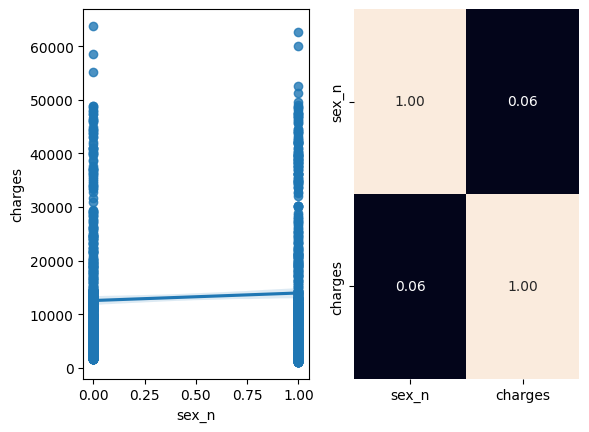

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,2)
sns.regplot(data=df,x='sex_n',y='charges',ax= axis[0])
sns.heatmap(df[['sex_n','charges']].corr(),annot=True,fmt='.2f',cbar=False,ax= axis[1])
plt.show()

In [14]:
num_variables = ['age','bmi','smoker_n','charges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado2 = pd.DataFrame(columnas_escaladas, index = df.index,columns=num_variables)
df_escalado2

,age,bmi,smoker_n,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,1.0,0.009636
2,0.217391,0.458434,1.0,0.053115
3,0.326087,0.181464,1.0,0.333010
4,0.304348,0.347592,1.0,0.043816
...,...,...,...,...
1332,0.695652,0.403820,1.0,0.151299
1333,0.000000,0.429379,1.0,0.017305
1334,0.000000,0.562012,1.0,0.008108
1335,0.065217,0.264730,1.0,0.014144


In [15]:
from sklearn.model_selection import train_test_split

X = df_escalado2.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

MSE: 35841574.81814754
R2 : 0.8049502474643171
R2_ajustado 0.8044008115416814
